# Part 2: Design a biasing potential

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
from scipy.constants import R

RT = 300 * R * 1e-3

In [2]:
df_metad = plumed.read_as_pandas('data/metad.COLVAR')
df_static = plumed.read_as_pandas('data/static.COLVAR')

weights = np.exp(df_static['metad.bias'] / RT)

/tmp/ipykernel_16169/1063997956.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  df_metad = plumed.read_as_pandas('data/metad.COLVAR')
/tmp/ipykernel_16169/1063997956.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  df_static = plumed.read_as_pandas('data/static.COLVAR')


The following change of variables convenient to work with:

$
X = n_{O_P} - n_{O_W} + 6 \\
Y = n_{O_P} + n_{O_W} - 6
$

In [3]:
# Rescaling factor for "nicer" integral values of the coordination numbers
scale = 1.039661

x = scale * (df_metad.nop - df_metad.now) + 6
y = scale * (df_metad.nop + df_metad.now) - 6

x_edges = np.linspace(0, 2, 40)
y_edges = np.linspace(0, 2, 40)

x_range = 0.5 * (x_edges[1:] + x_edges[:-1])
y_range = 0.5 * (y_edges[1:] + y_edges[:-1])

xy_extent = x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]

In [4]:
def bias_fn(x, y):
    X = x + 0.12 * (1 - np.cos(x * np.pi))
    Y = 0.7*(4*y - (1 - np.cos(x * np.pi)))
    return -1.875 * (X > 0) * (X < 2) * (Y > 0) * (Y < 2) * (1 - np.cos(X * np.pi)) * (1 - np.cos(Y * np.pi))

/tmp/ipykernel_16169/1880892976.py:2: RuntimeWarning: divide by zero encountered in log
  fes = -RT * np.log(density)


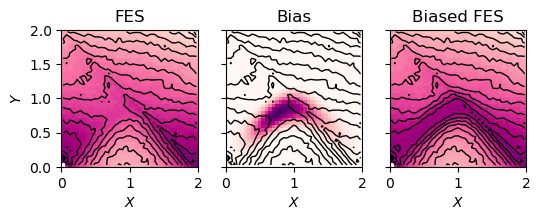

In [5]:
density, _, _ = np.histogram2d(x, y, bins=(x_edges, y_edges), density=True, weights=weights)
fes = -RT * np.log(density)
fes -= fes.min()

levels = np.arange(0, 60, RT)

xx, yy = np.meshgrid(x_range, y_range, indexing='ij')

fig, axarr = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(6, 3))

ax = axarr[0]
im = ax.imshow(fes.T, origin='lower', extent=xy_extent, cmap='RdPu_r')
contour = ax.contour(x_range, y_range, fes.T, levels=levels, colors='black', linestyles='solid', linewidths=1)
ax.set_title("FES")
ax.set_xlabel(r"$X$")
ax.set_ylabel(r"$Y$")

ax = axarr[1]
im = ax.imshow(bias_fn(xx, yy).T, origin='lower', extent=xy_extent, cmap='RdPu_r')
contour = ax.contour(x_range, y_range, fes.T, levels=levels, colors='black', linestyles='solid', linewidths=1)
ax.set_title("Bias")
ax.set_xlabel(r"$X$")

ax = axarr[2]
im = ax.imshow(fes.T + bias_fn(xx, yy).T, origin='lower', extent=xy_extent, cmap='RdPu_r')
contour = ax.contour(x_range, y_range, fes.T + bias_fn(xx, yy).T, levels=levels, colors='black', linestyles='solid', linewidths=1)
ax.set_title("Biased FES")
ax.set_xlabel(r"$X$")

plt.savefig("figures/bias_design_xy.png")

In [6]:
def bias_fn(X, Y):
    return -1.875 * (X > 0) * (X < 2) * (Y > 0) * (Y < 2) * (1 - np.cos(X * np.pi)) * (1 - np.cos(Y * np.pi))

/tmp/ipykernel_16169/625940614.py:17: RuntimeWarning: divide by zero encountered in log
  fes = -RT * np.log(density)


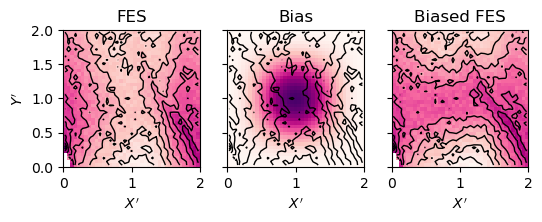

In [7]:
X = x + 0.12 * (1 - np.cos(x * np.pi))
Y = 4 * 0.7 * (y - (1 - np.cos(x * np.pi)) / 4)

X_edges = np.linspace(0, 2, 40)
Y_edges = np.linspace(0, 2, 40)


X_range = 0.5 * (X_edges[1:] + X_edges[:-1])
Y_range = 0.5 * (Y_edges[1:] + Y_edges[:-1])

XX, YY = np.meshgrid(X_range, Y_range, indexing='ij')


XY_extent = X_edges[0], X_edges[-1], Y_edges[0], Y_edges[-1]

density, _, _ = np.histogram2d(X, Y, bins=(X_edges, Y_edges), density=True, weights=weights)
fes = -RT * np.log(density)
fes -= fes.min()


fig, axarr = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(6, 3))

ax = axarr[0]
im = ax.imshow(fes.T, origin='lower', extent=XY_extent, cmap='RdPu_r')
contour = ax.contour(X_range, Y_range, fes.T, levels=levels, colors='black', linestyles='solid', linewidths=1)
ax.set_title("FES")
ax.set_xlabel(r"$X'$")
ax.set_ylabel(r"$Y'$")

ax = axarr[1]
im = ax.imshow(bias_fn(XX, YY).T, origin='lower', extent=XY_extent, cmap='RdPu_r')
contour = ax.contour(X_range, Y_range, fes.T, levels=levels, colors='black', linestyles='solid', linewidths=1)
ax.set_title("Bias")
ax.set_xlabel(r"$X'$")

ax = axarr[2]
im = ax.imshow(fes.T + bias_fn(XX, YY).T, origin='lower', extent=XY_extent, cmap='RdPu_r')
contour = ax.contour(X_range, Y_range, fes.T + bias_fn(XX, YY).T, levels=levels, colors='black', linestyles='solid', linewidths=1)
ax.set_title("Biased FES")
ax.set_xlabel(r"$X'$")

plt.savefig("figures/bias_design_XY.png")